# FunOS module init analysis 

In [1]:
# *NOTE*: run this command to clean output cell and meta data.
#nb-clean clean  ./funos_stats_analysis/fun_module_init_analysis.ipynb

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Tuple
import yaml
import json
import os
import logging

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

#https://stackoverflow.com/questions/36288670/how-to-programmatically-generate-markdown-output-in-jupyter-notebooks
from IPython.display import display, Markdown, Latex

In [3]:
try:
    from dpcsh_interactive_client.funos_module_init_time import *

except ImportError:
    from funos_module_init_time import *

## Module and notif init file loading

In [4]:
# A logger for this file
logger = logging.getLogger(__name__)


In [5]:
# load config file
current_path = os.getcwd()
print("current directory is: " + current_path)

# INPUT_FILE_URL = "uartout0.0.txt"
# INPUT_FILE_URL = "http://palladium-jobs.fungible.local:8080/job/4297914/raw_file/odp/uartout0.0.txt"
INPUT_FILE_URL = os.environ.get("INPUT_FILE_URL","")
# import pdb;pdb.set_trace()
if  INPUT_FILE_URL=="":
    INPUT_FILE_URL = "http://palladium-jobs.fungible.local:8080/job/4297914/raw_file/odp/uartout0.0.txt"


fun_module_notif_init_df, result = process_module_notif_init_data(
    INPUT_FILE_URL, logger=logger, working_dir=current_path
)

current directory is: /Users/insop/Projects/Fng/FunTools/dpcsh_interactive_client/src/dpcsh_interactive_client


## Plot all modules and notif init

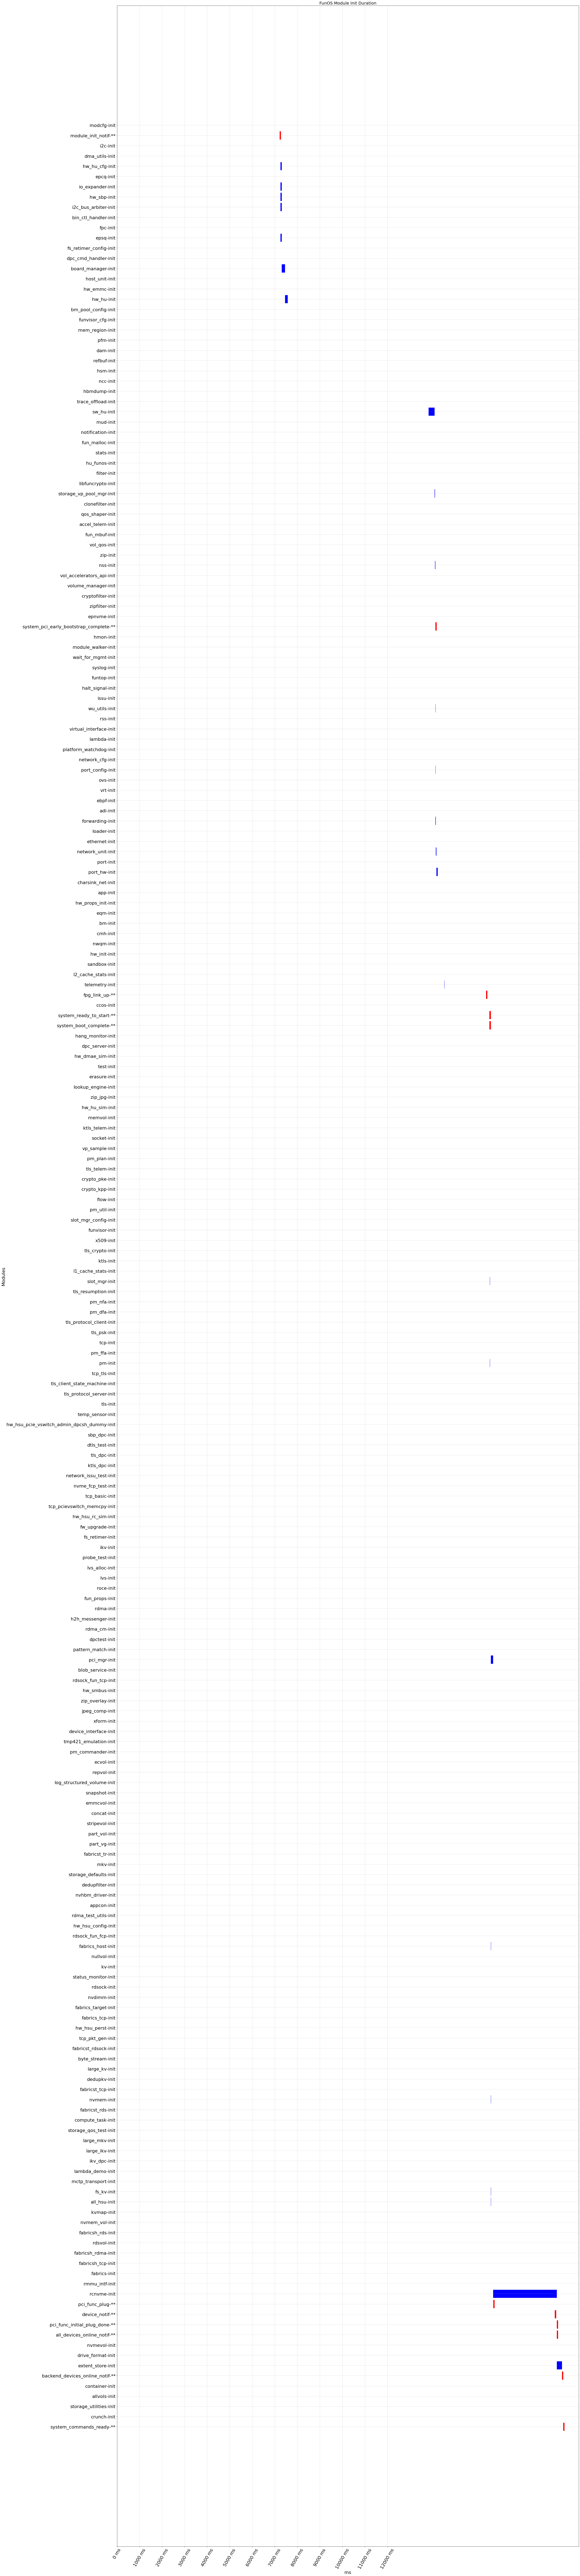

In [6]:
# MAIN CALLS
# plot the events
working_dir = "."
full_module_notif_chart = os.path.join(working_dir, "fun_module_notif_init_chart.png")
plot_module_time_chart(fun_module_notif_init_df, disp_granualarity_ms=1000, debug=False)

## Collapsed Plot all modules and notif init

# MAIN CALLS
# plot the events
working_dir = "."
full_module_notif_chart = os.path.join(working_dir, "fun_module_notif_init_chart.png")
plot_module_time_chart(fun_module_notif_init_df, save_file_name=full_module_notif_chart, disp_granualarity_ms=1000, debug=False)

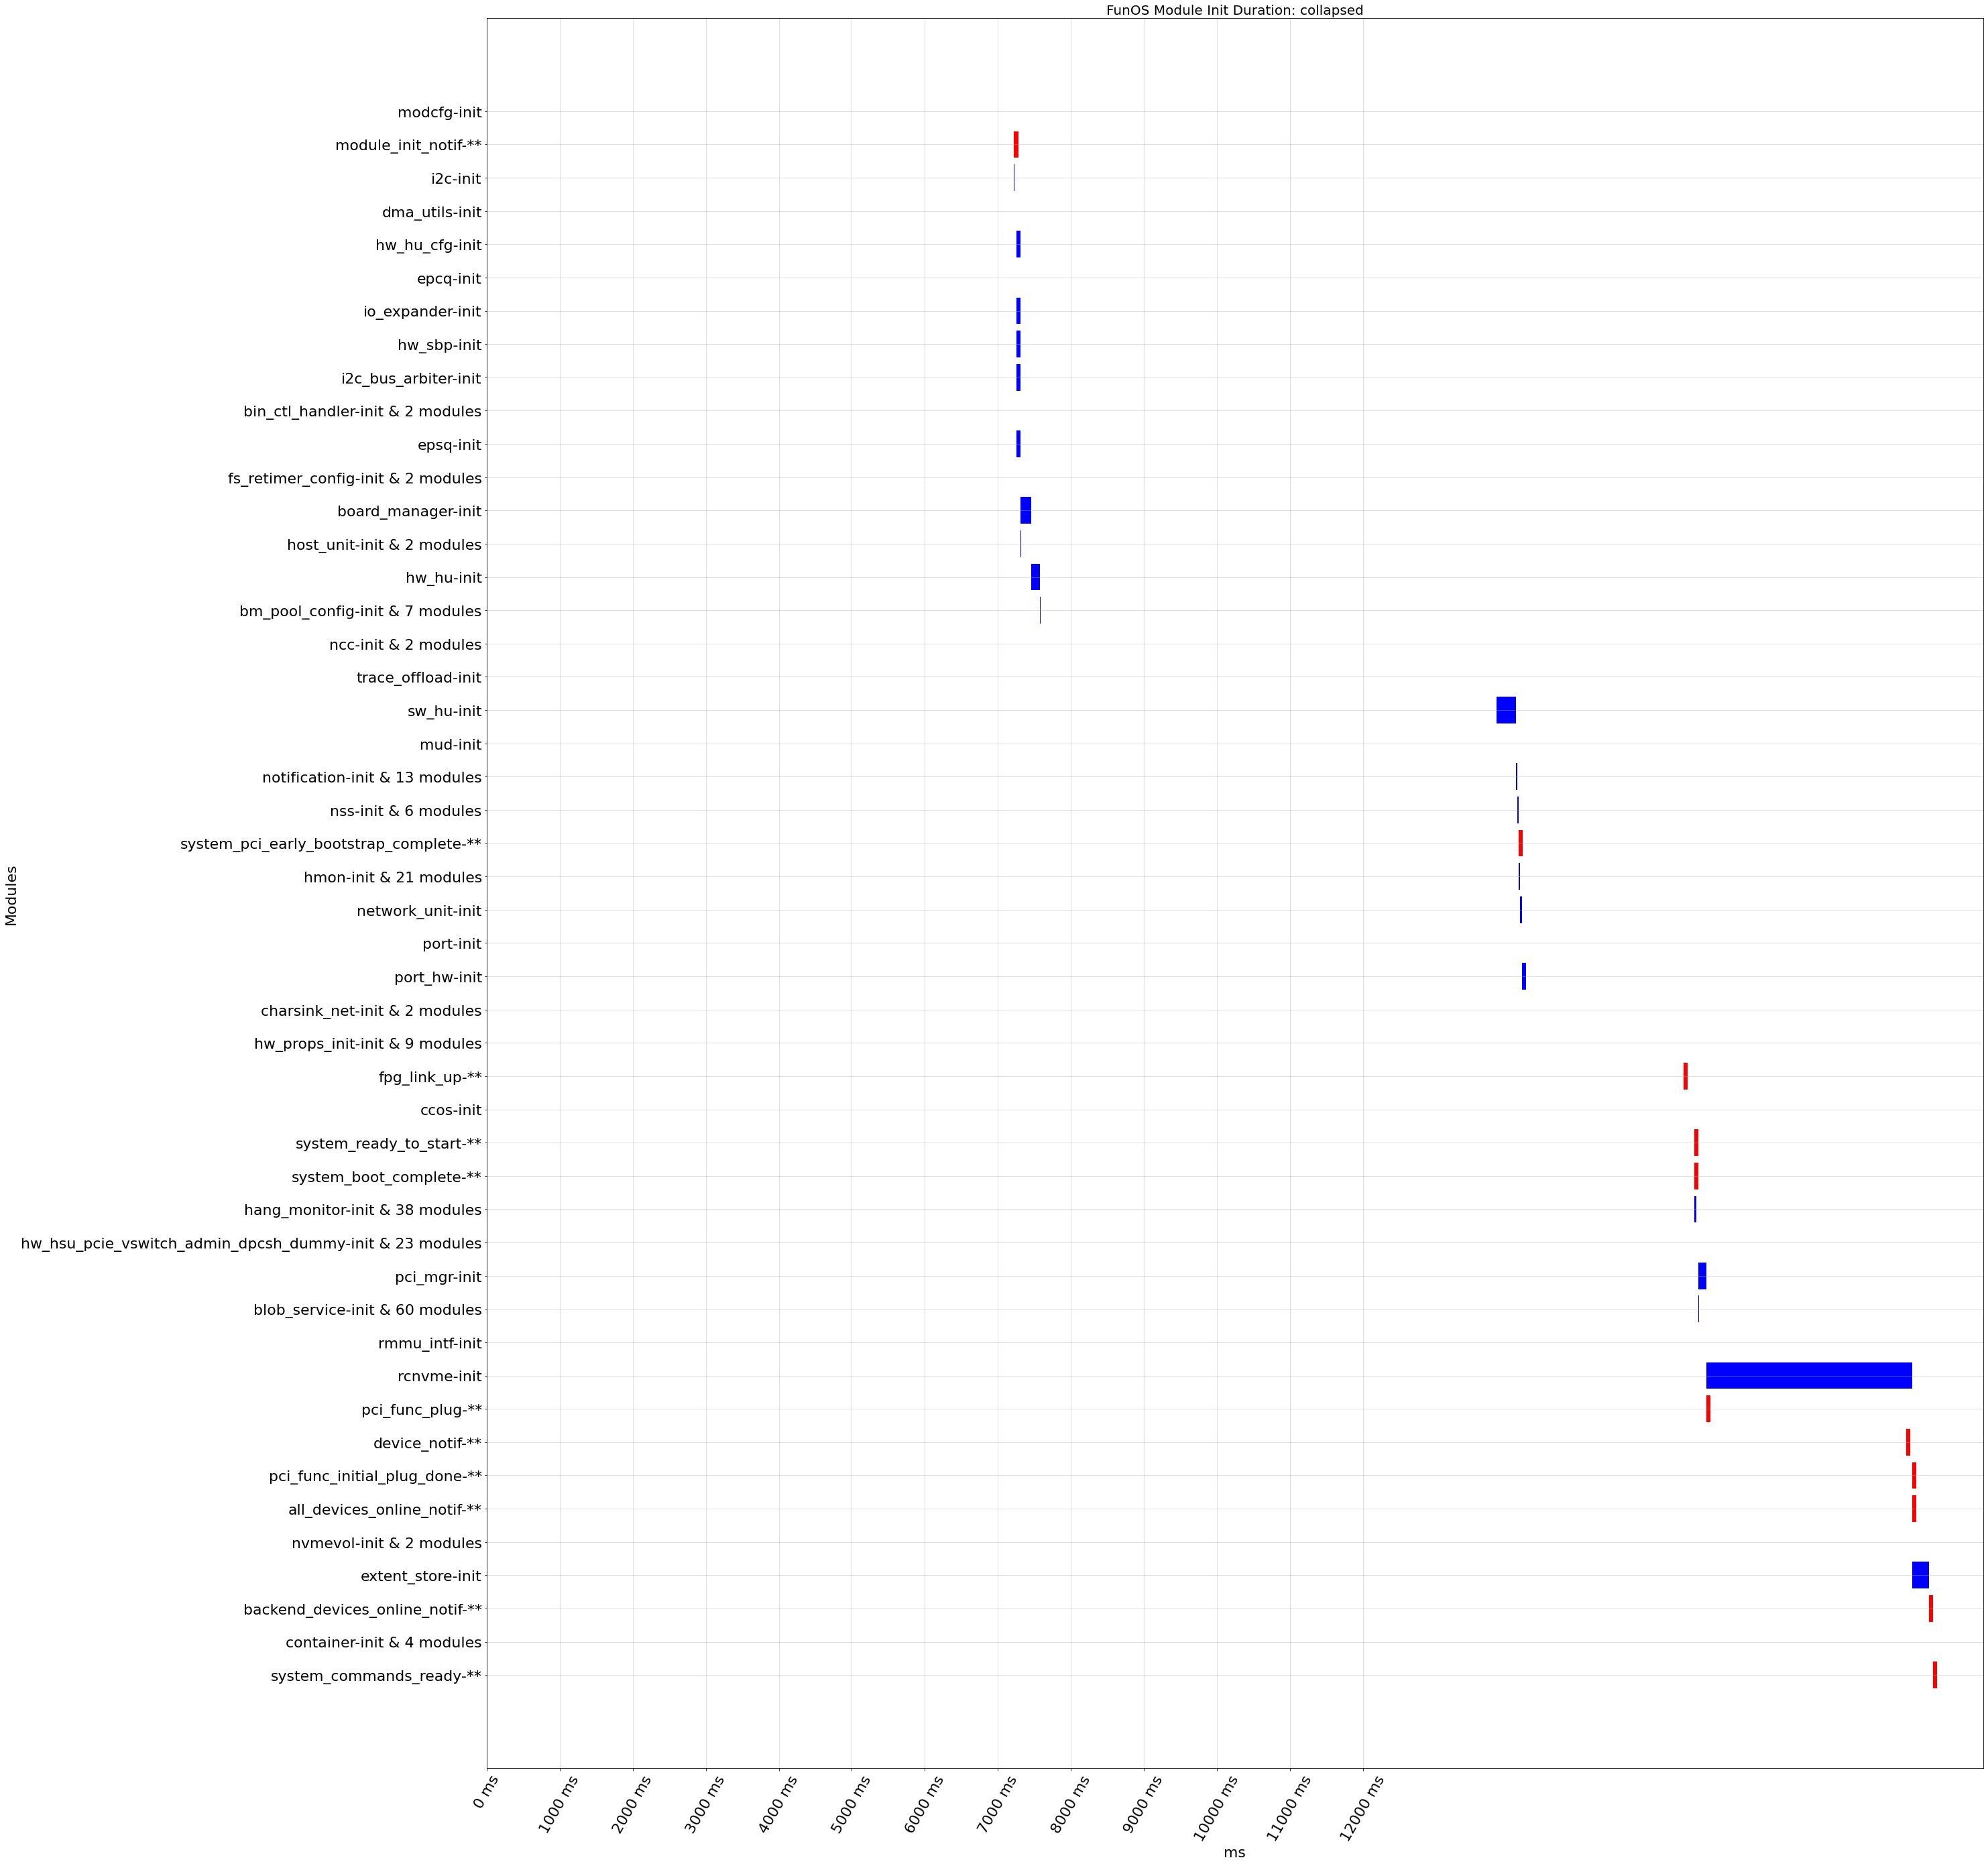

In [7]:
# MAIN CALLS
# plot the events

threshold_collapse = get_duration_threshold(fun_module_notif_init_df, threshold=0.01)

fun_module_notif_init_df_collapsed, group_table_module_notif = get_collapsed_df(fun_module_notif_init_df, threshold_collapse, debug=False)

working_dir = "."

save_file_name = os.path.join(working_dir, "fun_module_notif_init_df_collapsed.png")

plot_module_time_chart(fun_module_notif_init_df_collapsed, disp_granualarity_ms=1000, debug=False, group_table=group_table_module_notif)

print_group_table(group_table_module_notif, threshold=threshold_collapse, save_file_name=save_file_name)